In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---

## For **train_model** function

In [4]:
train, test, predict= get_lstm_data(SP500_TICKER)
x_train = train["x"] 
y_train = train["y"]

x_test = test["x"]
y_test = test["y"]

# print(indicators_train.shape)
# print(target_train.shape)

# print(indicators_test.shape)
# print(target_test.shape)

In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 53163955593412608.0000 - mean_absolute_error: 126584384.0000
Epoch 2/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5450558976.0000 - mean_absolute_error: 43897.6562
Epoch 3/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 489954.2188 - mean_absolute_error: 556.8959
Epoch 4/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 489841.9688 - mean_absolute_error: 554.9139
Epoch 5/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 504272.0938 - mean_absolute_error: 563.1529
Epoch 6/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 493383.4375 - mean_absolute_error: 555.7068
Epoch 7/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 490013.9375 - mean_absolute_error: 554.8134
Epoch 8/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 497272.8125 - mean_absolute_error: 559.2855
Epoch 9/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 499402.0312 - mean_absolute_error: 561.0155
Epoch 10/200
152/152 ━━━━━━━━━━━

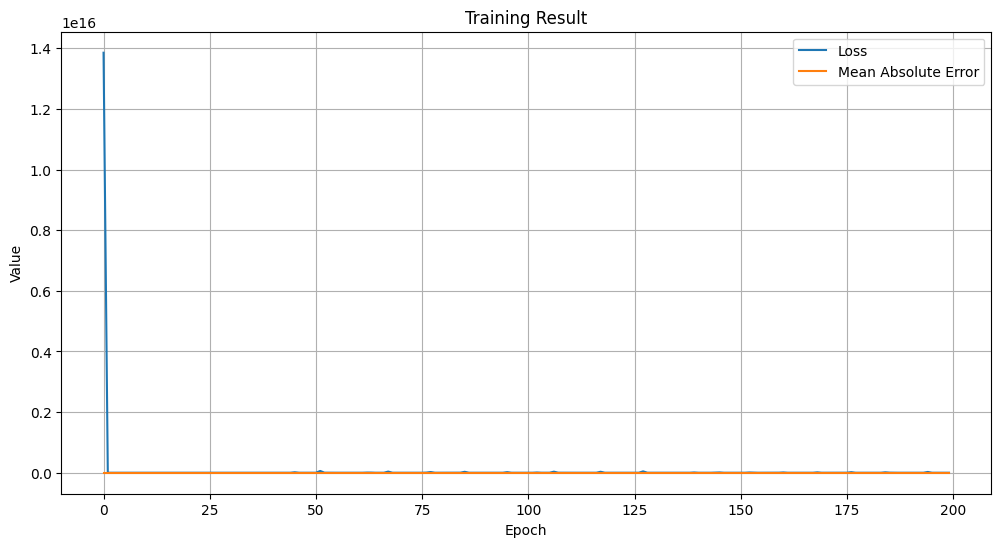

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./models/lstm_v2/lstm_model_v2.

In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)
plot_model_performance(fit_result)
save_lstm_model(model)

In [ ]:
model = load_lstm_model()

In [ ]:
predictions = model.predict(x_test)

plt = config_chart('Predictions Test Result')
plt.plot(y_dates_test[:, 0], y_test[:, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

In [ ]:
predictions = model.predict(x_predict)

plt = config_chart('Predictions First Day Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

In [ ]:
print(len(y_predict))
print(len(predictions))
plot_scatter_data(y_predict, predictions)

In [ ]:
plot_distribution_data(y_predict[:, 0].flatten(), predictions[:, 0].flatten())

In [ ]:
# index = 0

# plt = config_chart('Predictions Result')
# plt.plot(x_dates_predict[index], x_predict[index], color='blue')
# plt.plot(y_dates_predict[index], y_predict[index], color='green')
# plt.plot(y_dates_predict[index], predictions[index], color='red')
# plt.legend(['Data', 'Real', 'Predictions'])